# 3.3 ADTs Homework
Rhitt C.

## Question 1A - Queues for Limited Resources

## Question 1B - Standard Queue Signatures

## Question 2A - Ranking in Queues

## Question 2B - Priority Queue Example Problems

Give **two** different examples of using the ADT you have identified for this task. Describe in detail how it would be used to model the real world information.

### Response 1 (Basic) - Job Scheduling

### Response 2 (Main) - Exam Results

#### Background - can be skipped without loss of continuity

We live in the intellectual utopia of Dijkstrasia, home to IIT (Irodov Institute of Technology), the world's top university for Mathematics, Physics and Computer Science. IIT has a very rigorous entrance examination process that is intended to only accept the brightest of minds. 

$10$ years ago, in the city of Trantor, several high schools formed a coalition known as the Teal League. These schools then jointly developed the exclusive "IIT-topper" course, where enrolled students are prepared extensively for the exam, with an average workload of $14$ hours a day. As a result, the Trantor League schools account for over $60\%$ of IIT admissions, despite only making up $0.1\%$ of applicants.

For the past few years, parents have been migrating to Trantor en mass in hopes of sending their children to Teal Leagues and clearing a path to IIT. As a result, there is currently a severe underrepresentation of working class citizens in all other parts of Dijkstrasia. The country is unable to support its large retired demographic, and is projected to collapse within the next $50$ years. The only way for Dijkstrasia to evade its imminent downfall is to disincentivise migration to Trantor immediately.

Due to the great lobbyist power of the Teal League, the parliament is unable to pose restrictions on their "IIT-topper" course. So, upon great deliberation, Dijkstrasia has decided to attack the IIT examination process instead. We have been assigned the task of designing a new student ranking system that guarantees that admissions are spread across the different regions of Dijkstrasia, and not just awarded on the basis of exam scores alone. Additionally, the implementation should be able to output the rankings of students in each exam centre for each exam round (more on this below)<br><br>


<p align="center">
  <img src="yamiyugi.jpeg"><br>
  <i>The most popular card game of Dijkstrasia is Yu-Gi-Oh!</i>
</p>

#### Description and Constraints of Problem
Problem: Design ranking system to admit student entry based on exam scores and area of residence, then report student scores and rankings in each centre


There are 3 exam rounds in this order

- Prelims
    - Taken in centres dispersed across country, each with capacity of $1000$ students
- Mains
    - One centre per region - each with unlimited capacity
- Advanced
    - One centre per state - unlimited capacity

Must rank high in one round to proceed to next

Exam scores reported to system in batches of exam centre, though specific order of reported scores in a batch is random

#### Modelling with Maximum Priority Queues

The problem can be solved by only permitting the top few scorers of each batch into the next round. Because batches are taken from centres, this ensures a more equal spread of candidates.


The rankings of each batch can be modelled using priority queues. 

1. As papers are reported, the names of students are inputted into these queues with priority correlating to the scores (potentially adjusted according to special considerations). With a regular binary heap implementation of priority queues, this takes $n\cdot O(\log{n}) = O(n\log{n})$ time, where $n$ is the number of students in the batch. With a fibonacci heap, this can be reduced to an amortised complexity of $O(n)$.

2. Once all scores of a batch have been recorded, top rankers are then dequeued and their names and scores are reported to the respective centres for publication.

3. The system indicates that all subsequent names and scores are of unfortunate failures. They are reported in a similar manner. In any implementation, both accessing the front and dequeuing take $O(\log{n})$ time, so steps $2$ and $3$ together take a total of $O(n\log{n})$ time.

4. Once all the batches of a round have been processed, the next round begins, following identical steps. Once Advanced has been processed, the final rankings of the toppers are published nation-wide.


The effective time complexity of the algorithm taken by the system is therefore $O(n\log{n})$.

#### Binary Heap Implementation - can be skipped without loss of continuity

As an academic exercise, I will be implementing the Priority Queue ADT manually as a Binary Heap

At its core, the Binary Heap implementation of Priority Queues is a dynamic array of keys stored contiguously in memory. According to CHES terminology, it is a list, however it is crucially a contiguous list, and not a linked list. All members can be accessed in $O(1)$, as it is stored contiguously like an array.

The keys correspond to the priority, and comparison between keys must be transitive. In this case, it contains the the exam score, and comparisons are between those scores. Every key additionally contains a pointer reference to its data, i.e. the name and other details of the student who obtained that score. Duplicate keys are allowed.

An important characteristic is that the list does not have the keys sorted in order as one would expect. Instead, each index holds the key at a fixed position of a sorted Binary Tree.

Below is a visualisation:

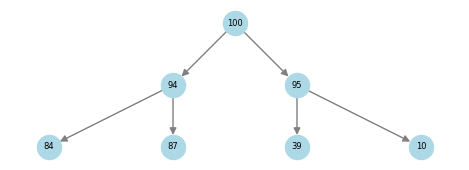

In [7]:
import user_library.rhitt_networkx as rhitt

# random score distribution
nodes = [100, 94, 95, 84, 87, 39, 10]

edges = [(100, 94), (100, 95), 
         (94, 84), (94, 87), 
         (95, 39), (95, 10)]

levels = {100: 0,
          94: 1,
          95: 1,
          84: 2,
          87: 2,
          39: 2,
          10: 2}

# make graph
G = rhitt.nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
    
rhitt.show(G, levels, 1.5)

It is stored contiguously in memory as follows:

| INDEX IN MEMORY   | 0     | 1     | 2     | 3     | 4     | 5     | 6     |
| ----------------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- |
| SCORE OF KEY      | 100   | 94    | 95    | 84    | 87    | 39    | 10    |
| PARENT            | Root  | 100   | 100   | 94    | 94    | 95    | 95    |

Minor language-specific change - I believe python lists are already implemented as dynamic arrays of pointers, so there is no need to implement the keys as separate to the data. For that reason, I am simply storing the priority score and data together. So the heap is effectively a list of immutable lists (tuples).


Provided VCE signature:

\begin{align*}
&\textbf{name } pQueue;\\
&\textbf{import } element, boolean, rank;\\
&\textbf{operations}\\
&|\quad minPQueue ∶ &\quad&\rightarrow pQueue;\\
&|\quad maxPQueue ∶ &\quad&\rightarrow pQueue; \\
&|\quad enqueue ∶ &pQueue \times element \times rank &\rightarrow pQueue; \\
&|\quad front ∶ &pQueue &\rightarrow element;\\
&|\quad dequeue ∶ &pQueue &\rightarrow pQueue; \\
&|\quad isEmpty ∶ &pQueue &\rightarrow boolean; 
\end{align*}

$$\downarrow$$

Slight modifications for ease of implementation:

\begin{align*}
&\textbf{name } pQueue;\\
&\textbf{import } element, boolean, rank;\\
&\textbf{operations}\\
&|\quad PQueue ∶ &boolean&\rightarrow pQueue;\\
&|\quad enqueue ∶ &pQueue \times rank \times element &\rightarrow pQueue; \\
&|\quad front ∶ &pQueue &\rightarrow element;\\
&|\quad dequeue ∶ &pQueue &\rightarrow pQueue; \\
&|\quad isEmpty ∶ &pQueue &\rightarrow boolean; 
\end{align*}

In [33]:
# I put this code into ../user_library/rhitt_pQueue.py

class pQueue:
    # pQueue constructor (operation)
    def __init__(self, min_heap=True):
        self.heap = []      # python lists [] are dynamic arrays of pointers to data
        self.min_heap = min_heap
        self.size = 0

    # helper functions
    def parent(self, i):
        return (i - 1) // 2
    
    def children(self, i):
        return (2*i + 1, 2*i + 2)

    def swap(self, i, j):
        temp = self.heap[i]
        self.heap[i] = self.heap[j]
        self.heap[j] = temp

    def compare(self, i, j):
        # out of bounds check
        if i < self.size:
            a = self.heap[i][0]
        else:
            return False
        if j < self.size:
            b = self.heap[j][0]
        else:
            return True

        return a <= b if self.min_heap else a >= b
    

    # standard operations
    def enqueue(self, priority, data):
        # store them together
        node = (priority, data)
        self.heap.append(node)
        self.size += 1

        # restore the heap property
        i = self.size - 1      # index of current node - start at end
        while i > 0:
            parent = self.parent(i)
            if self.compare(parent, i):
                break   # heap property is satisfied
            else:
                self.swap(i, parent)
            i = parent
        
        return self
        
    def dequeue(self):
        if self.isEmpty():
            return None     # nothing to dequeue
        
        # replace root with last dangling leaf node (no strings attached)
        self.heap[0] = self.heap[self.size-1]
        self.heap[self.size-1] = None
        self.size -= 1

        # restore heap property by iteratively swapping out violations
        i = 0   # index of current node - start at root
        while True:
            left, right = self.children(i)
            if left >= self.size:   # reached end, so finished
                break

            violation = i   # value of i is sentinel indicating NO violation
            if self.compare(left, i):
                violation = left
            if right < self.size and self.compare(right, violation):
                violation = right

            if violation == i:      # no violation
                break
            else:                   # resolve violation
                self.swap(i, violation)
                i = violation

        return self
    
    def front(self):
        if self.isEmpty():
            return None
        return self.heap[0]
    
    def isEmpty(self):
        return self.size == 0

In [34]:
import user_library.rhitt_pQueue as rhitt

# test pQueue

nodes = {100 : "Daniel", 39 : "Tam", 95 : "Sai", 84 : "Tim", 94 : "Edward", 87 : "Tom", 10 : "Rhitt"}
q = rhitt.pQueue(min_heap=False)
for n in nodes:
    print((n, nodes[n]))
    print("\t->", q.heap)
    
    q.enqueue(n, nodes[n])
    print("\t=>", q.heap)

print('\n' + '-'*113 + '\n')

while not q.isEmpty():
    print(q.front())
    q.dequeue()
    print("\t<-", q.heap)

(100, 'Daniel')
	-> []
	=> [(100, 'Daniel')]
(39, 'Tam')
	-> [(100, 'Daniel')]
	=> [(100, 'Daniel'), (39, 'Tam')]
(95, 'Sai')
	-> [(100, 'Daniel'), (39, 'Tam')]
	=> [(100, 'Daniel'), (39, 'Tam'), (95, 'Sai')]
(84, 'Tim')
	-> [(100, 'Daniel'), (39, 'Tam'), (95, 'Sai')]
	=> [(100, 'Daniel'), (84, 'Tim'), (95, 'Sai'), (39, 'Tam')]
(94, 'Edward')
	-> [(100, 'Daniel'), (84, 'Tim'), (95, 'Sai'), (39, 'Tam')]
	=> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim')]
(87, 'Tom')
	-> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim')]
	=> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim'), (87, 'Tom')]
(10, 'Rhitt')
	-> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim'), (87, 'Tom')]
	=> [(100, 'Daniel'), (94, 'Edward'), (95, 'Sai'), (39, 'Tam'), (84, 'Tim'), (87, 'Tom'), (10, 'Rhitt')]

-----------------------------------------------------------------------------------------------------------------

(100, 'Daniel

## Question 3 - Python Solution to 2B Example 2